### Prepare a prediction model for profit of 50_startups data.Do transformations for getting better predictions of profit and make a table containing R^2 value for each prepared model.

## 1.Import necessary Libraries

In [5]:
import numpy as np
from numpy import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import statsmodels.formula.api as sns
import statsmodels.api as sm

## 2.Import the Data

In [7]:
startup_data = pd.read_csv('50_Startups.csv')
startup_data

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


## 3.Data Understanding

In [8]:
startup_data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [9]:
startup_data.shape

(50, 5)

In [10]:
startup_data.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [11]:
startup_data.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

## 4.Data Cleaning

In [12]:
#Replacing the rows with no data to NaN
startup_data.replace(to_replace=0.00,value='NaN',inplace=True)

In [13]:
startup_data

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.2,136897.80,471784.1,New York,192261.83
1,162597.7,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.9,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [14]:
startup_data.dtypes

R&D Spend           object
Administration     float64
Marketing Spend     object
State               object
Profit             float64
dtype: object

In [15]:
startup_data.groupby(by='State').mean()

,Administration,Profit
State,,
California,120746.507059,103905.175294
Florida,121768.897500,118774.024375
New York,121543.470588,113756.446471


In [16]:
#fill nan values in r&d spend with california state value
startup_data['R&D Spend'] = startup_data['R&D Spend'].replace({'NAN':np.nan}).astype(float)

In [17]:
startup_data['R&D Spend'] = startup_data['R&D Spend'].fillna(value='64657.67',axis=0)

In [18]:
startup_data['R&D Spend']

0      165349.2
1      162597.7
2     153441.51
3     144372.41
4     142107.34
5      131876.9
6     134615.46
7     130298.13
8     120542.52
9     123334.88
10    101913.08
11    100671.96
12     93863.75
13     91992.39
14    119943.24
15    114523.61
16     78013.11
17     94657.16
18     91749.16
19      86419.7
20     76253.86
21     78389.47
22     73994.56
23     67532.53
24     77044.01
25     64664.71
26     75328.87
27      72107.6
28     66051.52
29     65605.48
30     61994.48
31     61136.38
32     63408.86
33     55493.95
34     46426.07
35     46014.02
36     28663.76
37     44069.95
38     20229.59
39     38558.51
40     28754.33
41     27892.92
42     23640.93
43     15505.73
44     22177.74
45      1000.23
46      1315.46
47     64657.67
48       542.05
49     64657.67
Name: R&D Spend, dtype: object

In [19]:
#fill nan values in r&d spend with mean value
startup_data['Marketing Spend'] = startup_data['Marketing Spend'].replace({'NAN':np.nan}).astype(float)

In [20]:
round(startup_data['Marketing Spend'].mean(),2)

224494.78

In [21]:
startup_data['Marketing Spend'] = startup_data['Marketing Spend'].fillna(value='224494.78',axis=0)

In [22]:
startup_data

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.2,136897.80,471784.1,New York,192261.83
1,162597.7,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.9,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [23]:
dummies = pd.get_dummies(startup_data.State)
dummies

,California,Florida,New York
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,1
4,0,1,0
5,0,0,1
6,1,0,0
7,0,1,0
8,0,0,1
9,1,0,0


In [24]:
merged = pd.concat([startup_data,dummies],axis=1)
merged

,R&D Spend,Administration,Marketing Spend,State,Profit,California,Florida,New York
0,165349.2,136897.80,471784.1,New York,192261.83,0,0,1
1,162597.7,151377.59,443898.53,California,191792.06,1,0,0
2,153441.51,101145.55,407934.54,Florida,191050.39,0,1,0
3,144372.41,118671.85,383199.62,New York,182901.99,0,0,1
4,142107.34,91391.77,366168.42,Florida,166187.94,0,1,0
5,131876.9,99814.71,362861.36,New York,156991.12,0,0,1
6,134615.46,147198.87,127716.82,California,156122.51,1,0,0
7,130298.13,145530.06,323876.68,Florida,155752.60,0,1,0
8,120542.52,148718.95,311613.29,New York,152211.77,0,0,1
9,123334.88,108679.17,304981.62,California,149759.96,1,0,0


In [25]:
final = merged.drop(['State','Florida'],axis=1)
final

,R&D Spend,Administration,Marketing Spend,Profit,California,New York
0,165349.2,136897.80,471784.1,192261.83,0,1
1,162597.7,151377.59,443898.53,191792.06,1,0
2,153441.51,101145.55,407934.54,191050.39,0,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,0,0
5,131876.9,99814.71,362861.36,156991.12,0,1
6,134615.46,147198.87,127716.82,156122.51,1,0
7,130298.13,145530.06,323876.68,155752.60,0,0
8,120542.52,148718.95,311613.29,152211.77,0,1
9,123334.88,108679.17,304981.62,149759.96,1,0


In [26]:
final[final.duplicated()] # No duplicated data

,R&D Spend,Administration,Marketing Spend,Profit,California,New York


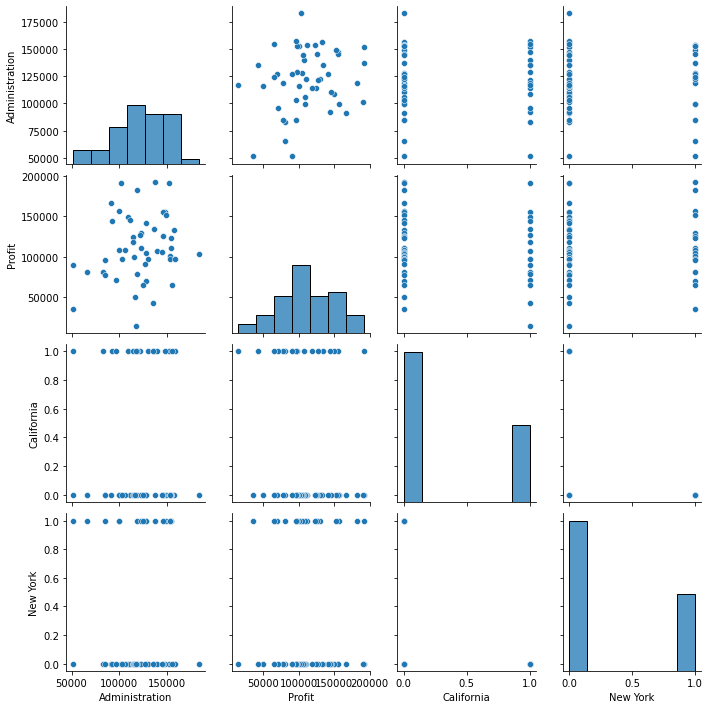

In [28]:
sns.pairplot(final)

## 4.Model Building

In [27]:
#Diving the data into input and output
X = final.drop(labels='Profit',axis=1).values
y = final['Profit'].values

In [28]:
X

array([[165349.2, 136897.8, 471784.1, 0, 1],
       [162597.7, 151377.59, 443898.53, 1, 0],
       [153441.51, 101145.55, 407934.54, 0, 0],
       [144372.41, 118671.85, 383199.62, 0, 1],
       [142107.34, 91391.77, 366168.42, 0, 0],
       [131876.9, 99814.71, 362861.36, 0, 1],
       [134615.46, 147198.87, 127716.82, 1, 0],
       [130298.13, 145530.06, 323876.68, 0, 0],
       [120542.52, 148718.95, 311613.29, 0, 1],
       [123334.88, 108679.17, 304981.62, 1, 0],
       [101913.08, 110594.11, 229160.95, 0, 0],
       [100671.96, 91790.61, 249744.55, 1, 0],
       [93863.75, 127320.38, 249839.44, 0, 0],
       [91992.39, 135495.07, 252664.93, 1, 0],
       [119943.24, 156547.42, 256512.92, 0, 0],
       [114523.61, 122616.84, 261776.23, 0, 1],
       [78013.11, 121597.55, 264346.06, 1, 0],
       [94657.16, 145077.58, 282574.31, 0, 1],
       [91749.16, 114175.79, 294919.57, 0, 0],
       [86419.7, 153514.11, '224494.78', 0, 1],
       [76253.86, 113867.3, 298664.47, 1, 0],
       

In [29]:
y

array([192261.83, 191792.06, 191050.39, 182901.99, 166187.94, 156991.12,
       156122.51, 155752.6 , 152211.77, 149759.96, 146121.95, 144259.4 ,
       141585.52, 134307.35, 132602.65, 129917.04, 126992.93, 125370.37,
       124266.9 , 122776.86, 118474.03, 111313.02, 110352.25, 108733.99,
       108552.04, 107404.34, 105733.54, 105008.31, 103282.38, 101004.64,
        99937.59,  97483.56,  97427.84,  96778.92,  96712.8 ,  96479.51,
        90708.19,  89949.14,  81229.06,  81005.76,  78239.91,  77798.83,
        71498.49,  69758.98,  65200.33,  64926.08,  49490.75,  42559.73,
        35673.41,  14681.4 ])

In [30]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [31]:
X_train.shape

(40, 5)

In [32]:
X_test.shape

(10, 5)

## 5.Model Training

In [33]:
sp_lin_model = LinearRegression()

In [34]:
sp_lin_model.fit(X_train,y_train)

LinearRegression()

In [35]:
sp_lin_model.coef_

array([ 6.89224245e-01,  3.13111506e-02,  7.42257769e-02, -3.17537447e+03,
       -1.43879387e+03])

In [36]:
sp_lin_model.intercept_

41749.15669758769

## 6.Model Testing

In [37]:
y_test_pred = sp_lin_model.predict(X_test)
y_test_pred = y_test_pred.round(2)
y_test_pred

array([ 80411.99, 104041.09, 101761.95, 149619.54, 124973.93, 193578.01,
        60809.54,  68335.69,  80736.97, 114227.1 ])

In [38]:
y_test

array([ 90708.19,  42559.73, 103282.38, 149759.96, 134307.35, 192261.83,
        65200.33,  49490.75,  81005.76, 108733.99])

## 7.Model Evaluation

In [39]:
model1 = r2_score(y_test,y_test_pred)
model1

0.7779239194150082

In [40]:
math.sqrt(mean_squared_error(y_test,y_test_pred))

20932.75698923484

### Improving the model by applying scaling techniques

In [41]:
scalar = MinMaxScaler()
X_train = scalar.fit_transform(X_train)
X_test  = scalar.transform(X_test)

In [42]:
X_train

array([[0.47207216, 0.4510652 , 0.31373886, 0.        , 1.        ],
       [0.        , 0.00432296, 0.50360536, 0.        , 1.        ],
       [0.58075797, 0.88143739, 0.63500862, 0.        , 1.        ],
       [0.57586206, 0.71456332, 0.56094692, 0.        , 0.        ],
       [0.44161095, 0.71967718, 0.79476057, 0.        , 1.        ],
       [0.33909277, 0.48655174, 0.48129746, 0.        , 0.        ],
       [0.4780522 , 0.66078277, 0.59376773, 1.        , 0.        ],
       [0.94349972, 0.4685842 , 0.91863251, 0.        , 0.        ],
       [0.39568296, 0.82952141, 0.30782885, 1.        , 0.        ],
       [0.73679128, 0.98922572, 0.57604548, 0.        , 0.        ],
       [0.37920572, 0.60480846, 0.20187421, 0.        , 0.        ],
       [0.81043055, 0.45607757, 0.81665575, 0.        , 1.        ],
       [0.38793347, 0.73241142, 0.09995896, 1.        , 0.        ],
       [1.        , 0.94064201, 1.        , 1.        , 0.        ],
       [0.40148819, 0.95618996, 0.

In [43]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [44]:
X_train.shape

(40, 5)

In [45]:
X_test.shape

(10, 5)

## 5.Model Training

In [46]:
sp_lin_model1 = LinearRegression()

In [47]:
sp_lin_model1.fit(X_train,y_train)

LinearRegression()

In [48]:
sp_lin_model1.coef_

array([ 7.14152083e-01,  7.54591561e-03,  6.24478076e-02, -5.81382372e+03,
       -1.09801978e+03])

In [49]:
sp_lin_model1.intercept_

43827.91934515865

## 6.Model Testing

In [51]:
y_test_pred = sp_lin_model1.predict(X_test)
y_test_pred = y_test_pred.round(2)
y_test_pred

array([ 64865.5 ,  97427.51, 143236.39, 119624.32,  99755.07, 129070.4 ,
       179646.35,  56983.6 , 170659.22, 118590.2 ])

In [52]:
y_test

array([ 71498.49, 101004.64, 156122.51, 122776.86, 103282.38, 125370.37,
       191050.39,  69758.98, 182901.99, 111313.02])

## 7.Model Evaluation

In [53]:
final_model = r2_score(y_test,y_test_pred)
final_model

0.952260643792572

In [54]:
math.sqrt(mean_squared_error(y_test,y_test_pred))

8689.190864581695

## Table containing R^2 value for each prepared model


In [41]:
d2={'Prep_Models':['Model','Final_Model'],'Rsquared':[model1,final_model]}
table=pd.DataFrame(d2)
table

,Prep_Models,Rsquared
0,Model,0.777924
1,Final_Model,0.952261
